In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
df=pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


# Lets start the EDA for the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Lets check some null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### It can be observed that there are some values with entry as Select which maybe recoreded as null values so replacing theem with null

In [8]:
df = df.replace('Select', np.nan)

In [9]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [10]:
# now again checking for null and nan values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [12]:
# Dropping the null values with more than 45 % null values
df=df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [13]:
# Checking again for null values
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

# Now handling other colums with null values 
## 1. City with 40 %

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

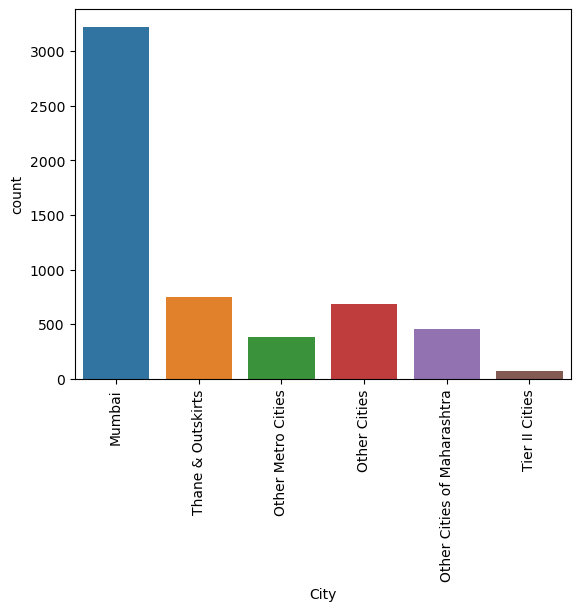

In [14]:
sns.countplot(df['City'])
plt.xticks(rotation=90)

In [15]:
round(df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [16]:
df['City']=df['City'].replace(np.nan,'Mumbai')

In [17]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

## 2. Tags


/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

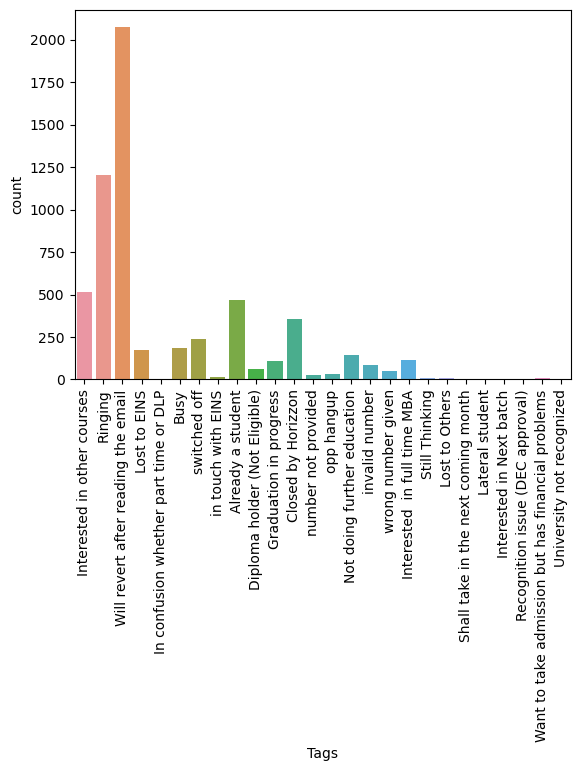

In [18]:
sns.countplot(df['Tags'])
plt.xticks(rotation=90)

Since the majority of values are "Will revert after reading the email," we can use this value to fill up any blanks in this column.

In [19]:
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [20]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

## 3. What matters most to you in choosing a course

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

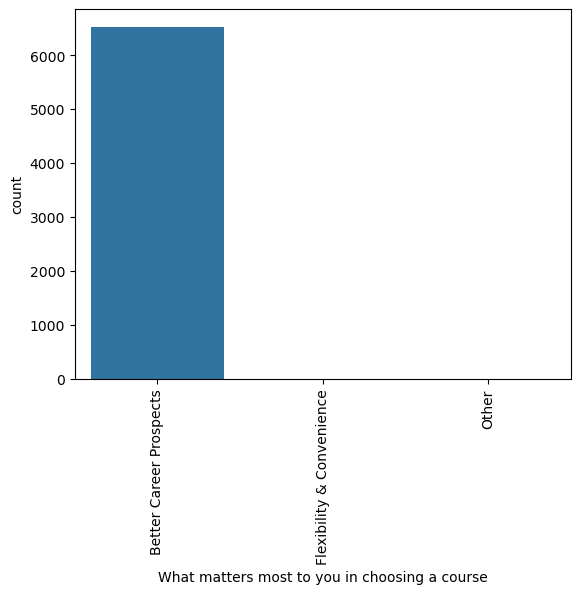

In [21]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [22]:
round(df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
df=df.drop('What matters most to you in choosing a course',axis=1)

In [24]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                              37.0
What is your current occupation             29.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

## 4. What is your current occupation 29%

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

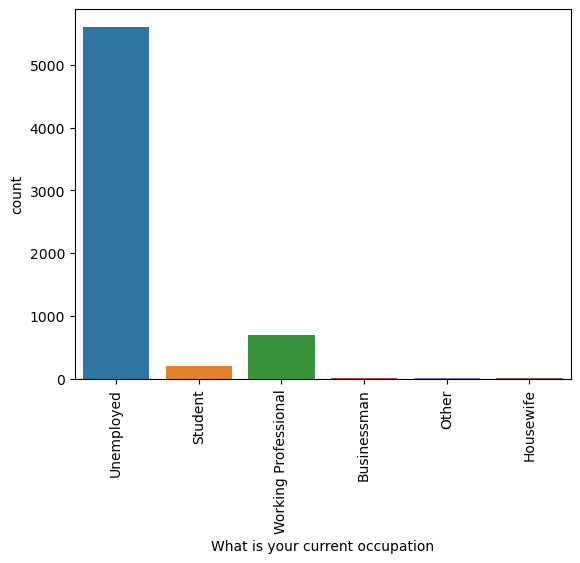

In [25]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)

In [26]:
round(df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [27]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [28]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                              37.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

## 5. Specialization 37%

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

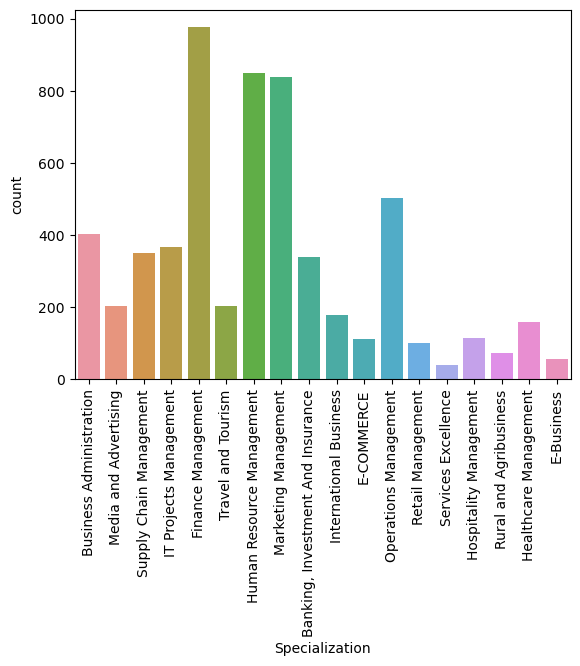

In [29]:
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)

In the Specialisation column, there are 37% missing values.If the lead is a student, does not have a speciality, or if his speciality is not included among the possibilities, he or she may choose to leave this section empty. Therefore, we can add a new category called "Others" for this.

In [30]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [31]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

## 6. Country 27%

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

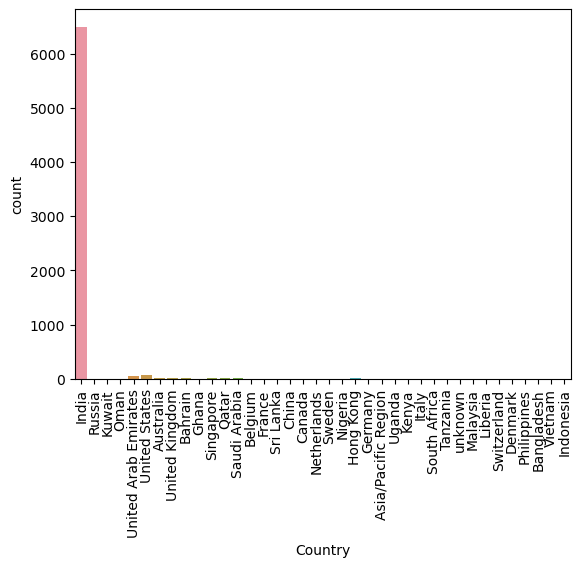

In [32]:
sns.countplot(df['Country'])
plt.xticks(rotation=90)

Although this column is clearly heavily slanted, it contains crucial information with regard to the lead. Since 'India' appears in the majority of values, we can use this value to fill in any gaps in this column.


In [33]:
df['Country']=df['Country'].replace(np.nan,'India')

In [34]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [35]:
# LEts drop the 1% null values
df.dropna(inplace = True)

In [36]:
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

## Lets check if there are any duplicate rows

In [37]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicate found

# Univariate and Bivariate Analysis

## 1. Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

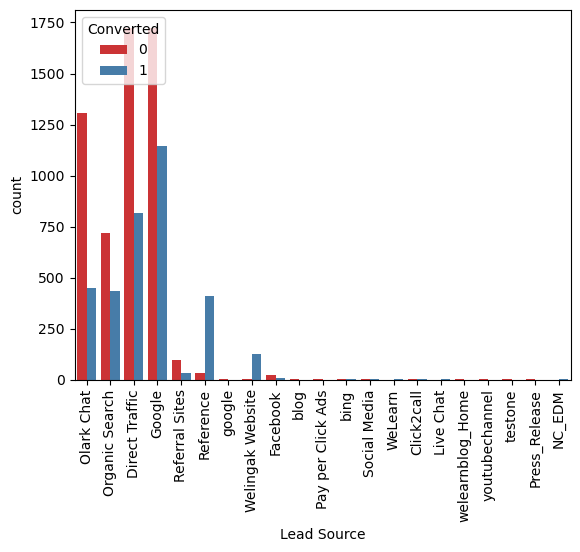

In [38]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set1')
plt.xticks(rotation = 90)

In [39]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [40]:
# Creating a new category 'Remaining' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Remaining')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Remaining')])

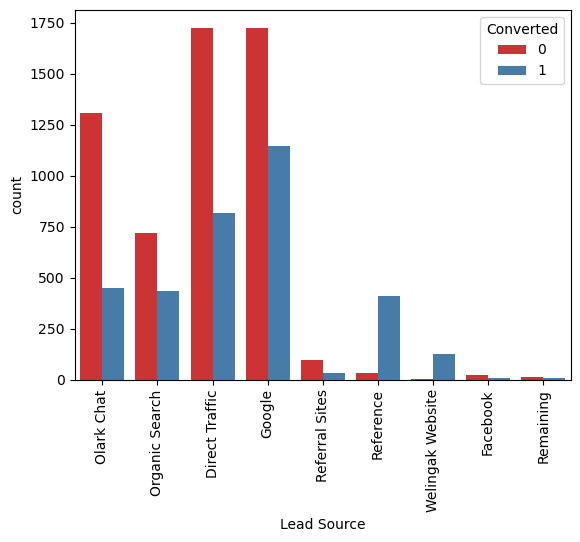

In [41]:
# Checking the agian
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

1.The greatest amount of leads are generated by Google and Direct traffic.

2.Reference leads and leads generated by the Welingak website have a high conversion rate.

Focus should be placed on enhancing lead conversion of olark chat, organic search, direct traffic, and google leads and produce more leads from reference and welingak website in order to enhance total lead conversion rate.

# 2. Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

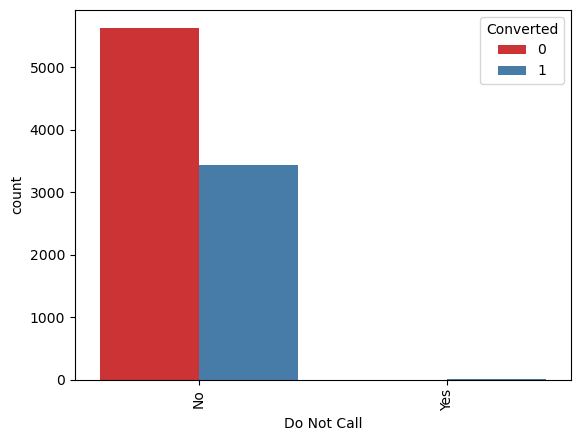

In [42]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

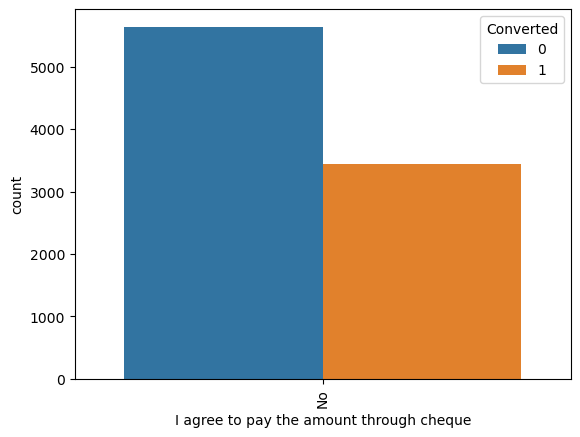

In [43]:
# 3. I agree to pay the amount through cheque
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

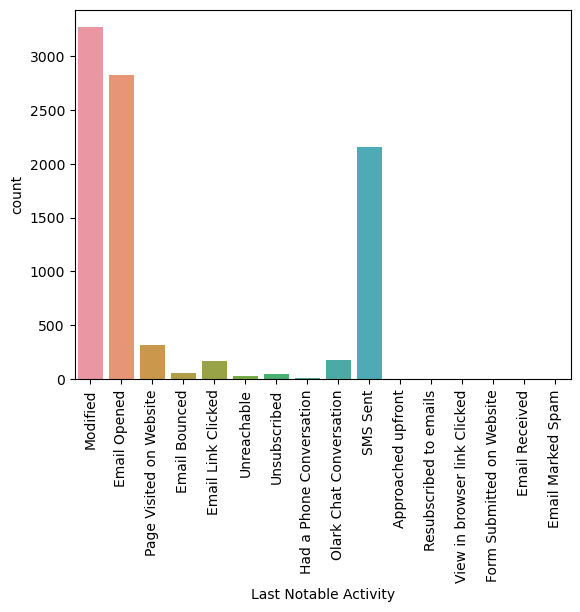

In [44]:
# 4. Last Notable Activity
sns.countplot(x = "Last Notable Activity", data = df)
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

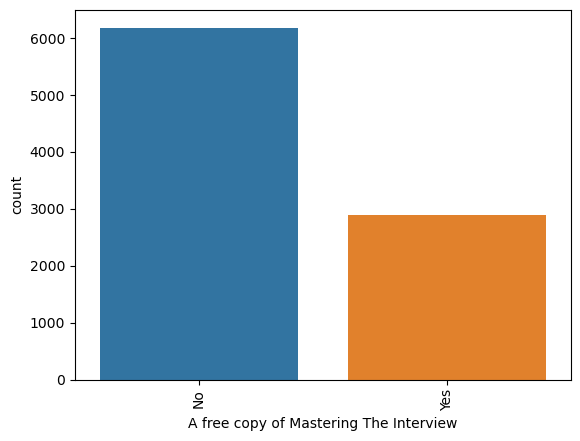

In [45]:
# 5. A free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", data = df)
plt.xticks(rotation = 90)


'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

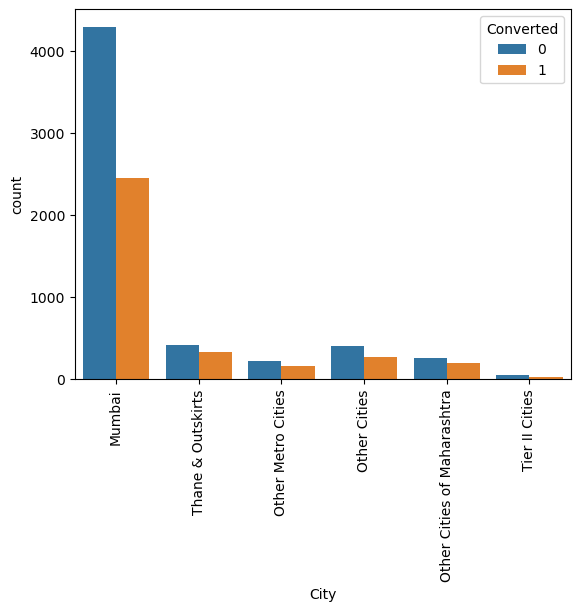

In [46]:
# 6. City
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 90)

 Major Leads are from Mumbai

(array([0]), [Text(0, 0, 'No')])

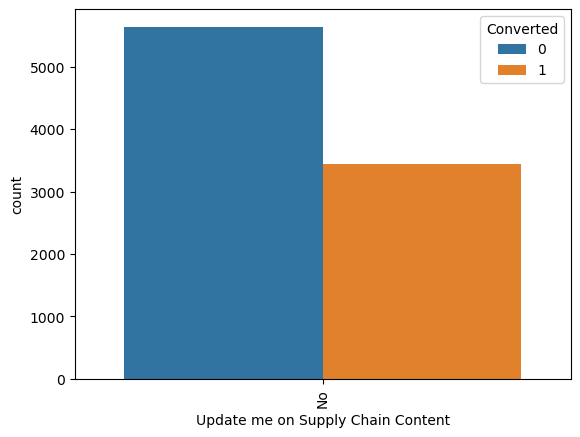

In [47]:
# 7. Update me on Supply Chain Content
sns.countplot(x = "Update me on Supply Chain Content", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0]), [Text(0, 0, 'No')])

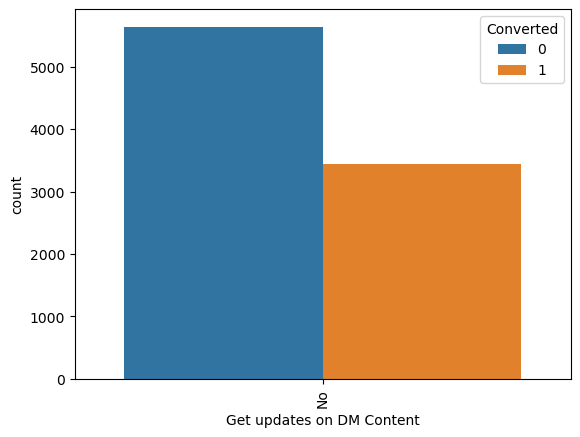

In [48]:
# 8.Get updates on DM Content
sns.countplot(x = "Get updates on DM Content", hue="Converted", data = df)
plt.xticks(rotation = 90)


'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

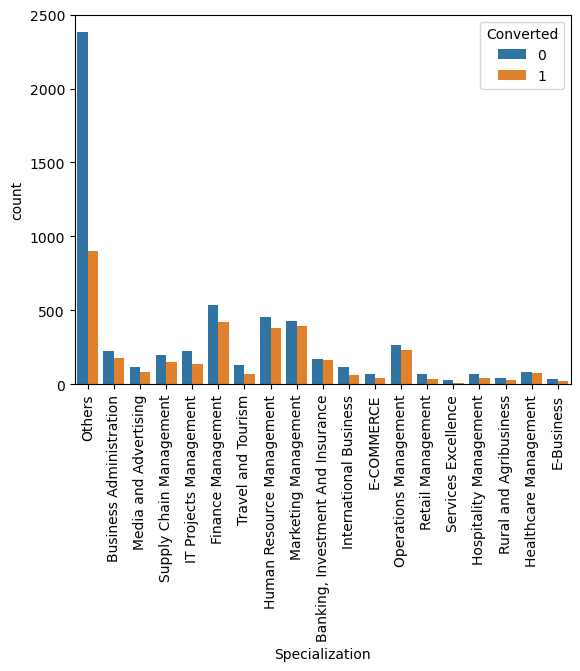

In [49]:
# 9. Specialization
sns.countplot(x = "Specialization", hue="Converted", data = df)
plt.xticks(rotation = 90)

'Specialisation' has a high conversion rate needs to receive greater attention.


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

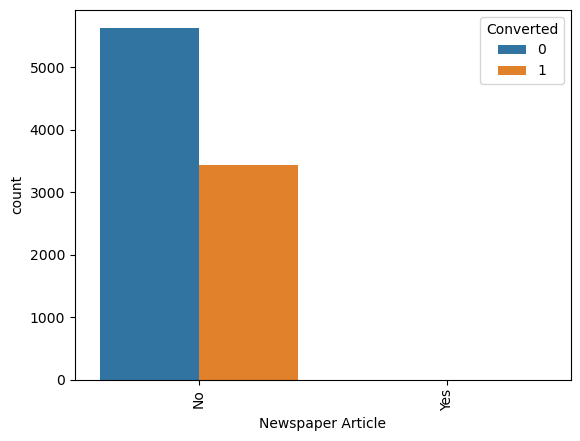

In [50]:
# 10.Newspaper Article
sns.countplot(x = "Newspaper Article", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

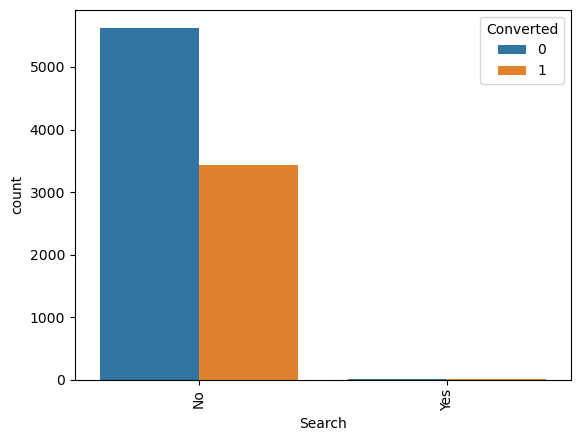

In [51]:
# 11. Search
sns.countplot(x = "Search", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0]), [Text(0, 0, 'No')])

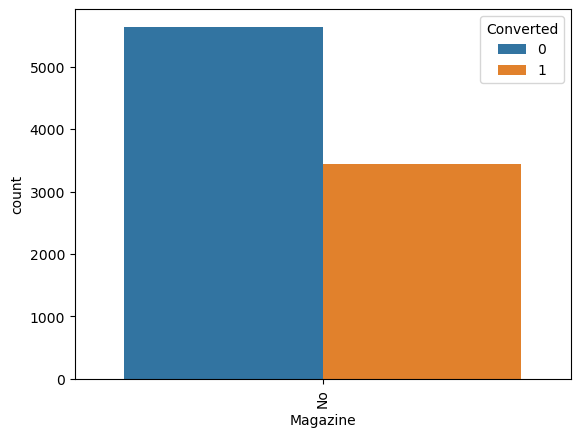

In [52]:
# 12. Magazine
sns.countplot(x = "Magazine", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

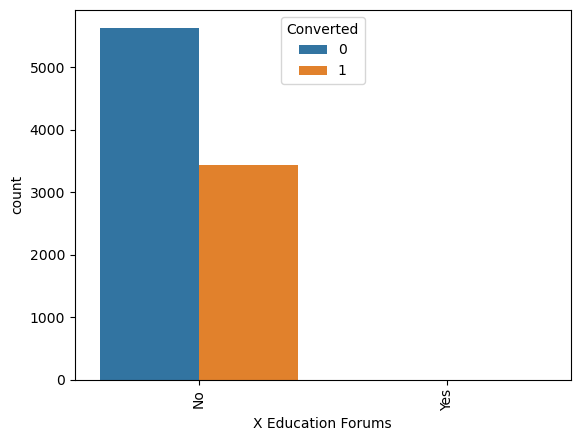

In [53]:
# 13. X Education Forums
sns.countplot(x = "X Education Forums", hue="Converted", data = df)
plt.xticks(rotation = 90)


'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

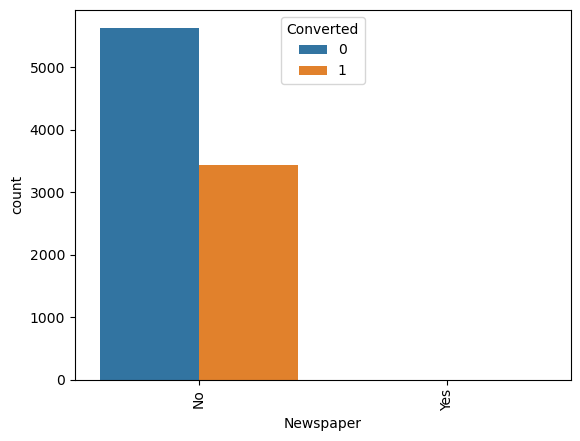

In [54]:
#14. Newspaper
sns.countplot(x = "Newspaper", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

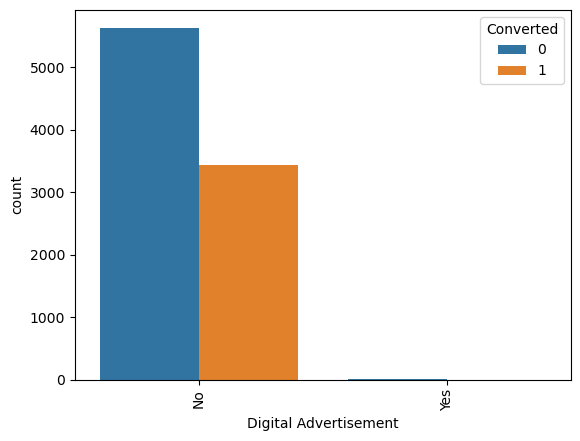

In [55]:
# 15. Digital Advertisement
sns.countplot(x = "Digital Advertisement", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

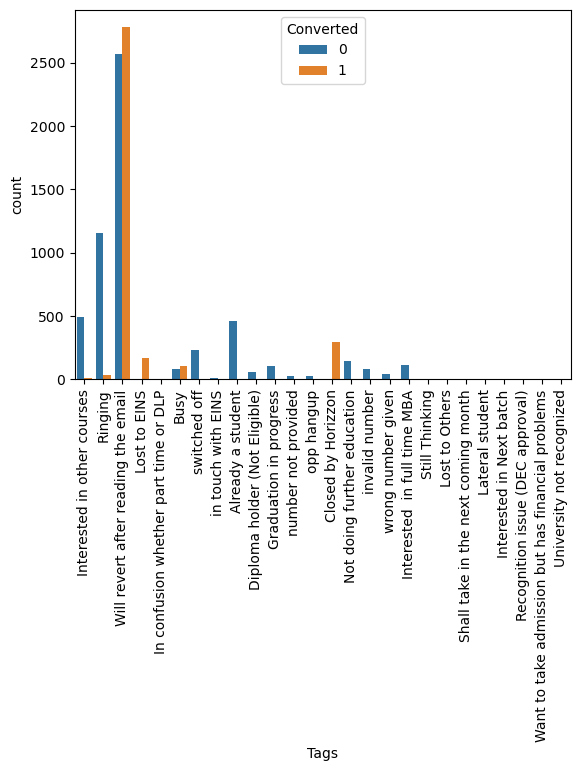

In [56]:
# 16.Tags
sns.countplot(x = "Tags", hue="Converted", data = df)
plt.xticks(rotation = 90)

This column is produced by the sales team for their analysis, therefore model building cannot use it. Therefore, before creating the model, we must delete this column.


(array([0]), [Text(0, 0, 'No')])

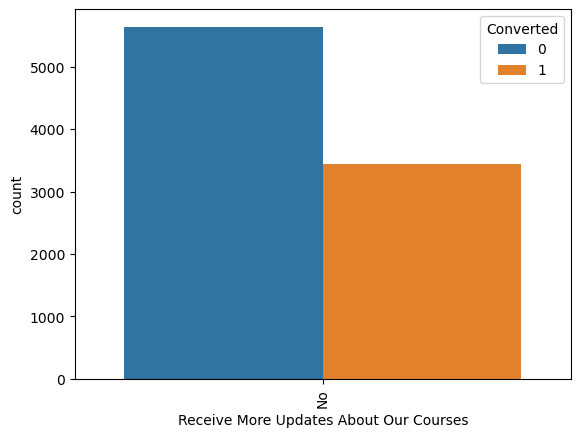

In [57]:
# 17. Receive More Updates About Our Courses
sns.countplot(x = "Receive More Updates About Our Courses", hue="Converted", data = df)
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

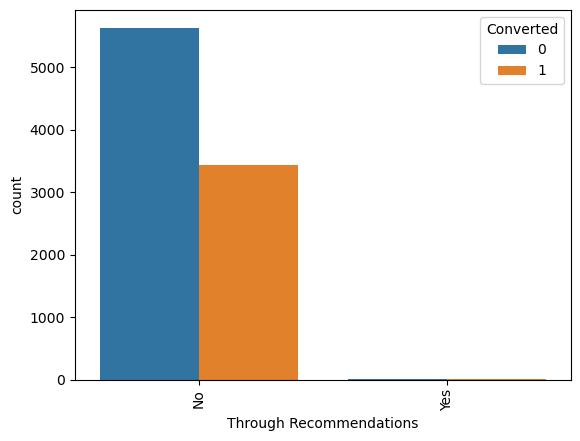

In [58]:
# 18. Through Recommendations
sns.countplot(x = "Through Recommendations", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0]), [Text(0, 0, 'No')])

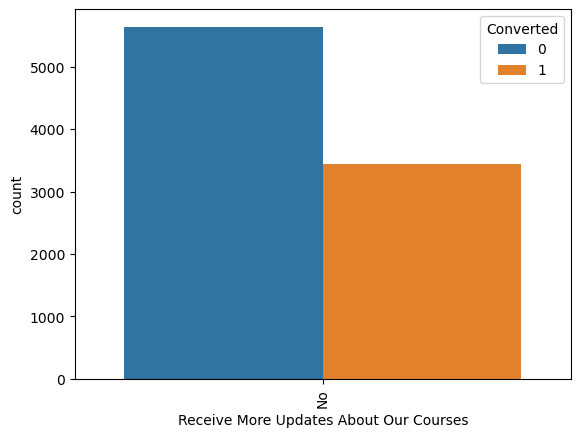

In [59]:
# 19. Receive More Updates About Our Courses
sns.countplot(x = "Receive More Updates About Our Courses", hue="Converted", data = df)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

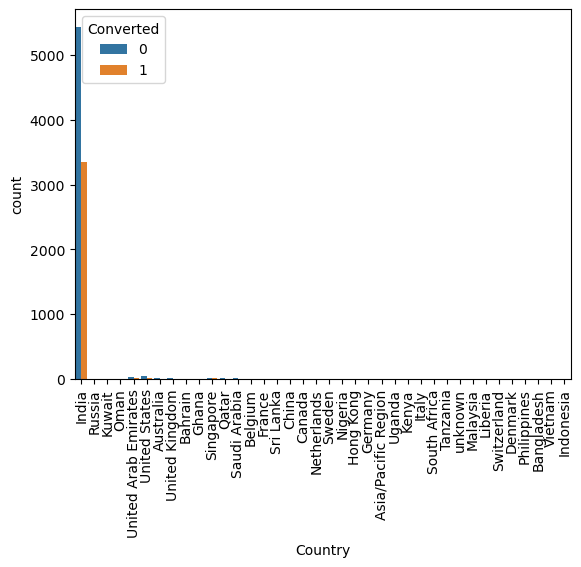

In [60]:
#20. # Country
sns.countplot(x = "Country", hue="Converted", data = df)
plt.xticks(rotation = 90)

Nothing can be concluded as most values are from India

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

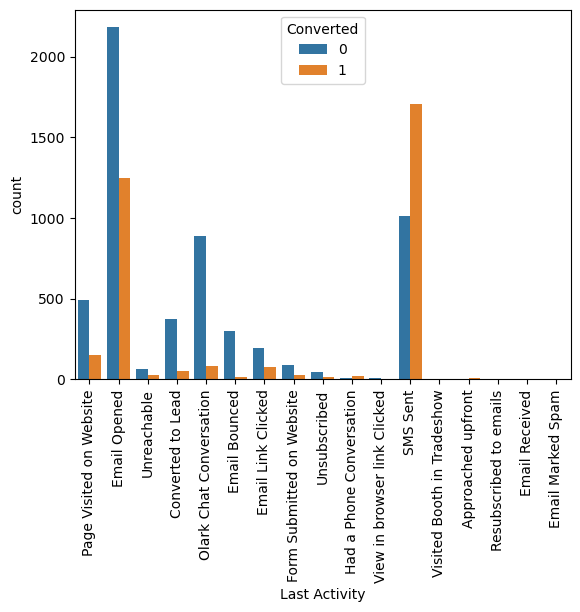

In [61]:
# 21.  Last Activity
sns.countplot(x = "Last Activity", hue="Converted", data = df)
plt.xticks(rotation = 90)

In [62]:
# The last activities can be combined with the "Other_Activity" activities, which include fewer data
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

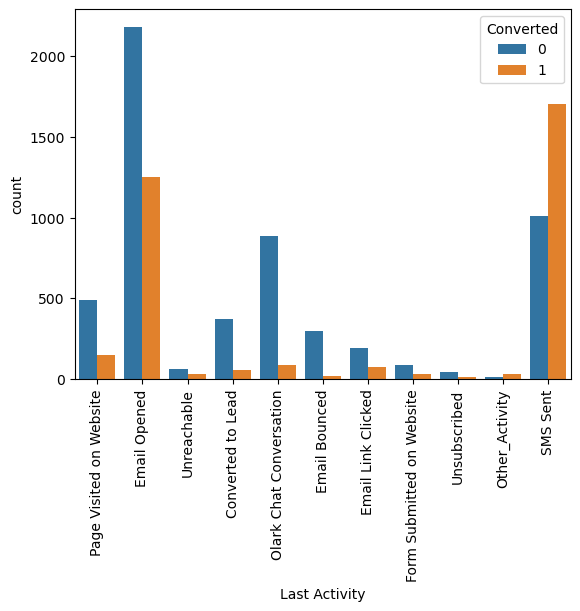

In [63]:
sns.countplot(x = "Last Activity", hue="Converted", data = df)
plt.xticks(rotation = 90)

- The majority of the leads' most recent action was to open an email.
- Nearly 60% of leads with an SMS sent as their most recent activity convert.


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.14'),
  Text(3, 0, '1.17'),
  Text(4, 0, '1.19'),
  Text(5, 0, '1.2'),
  Text(6, 0, '1.21'),
  Text(7, 0, '1.22'),
  Text(8, 0, '1.23'),
  Text(9, 0, '1.25'),
  Text(10, 0, '1.27'),
  Text(11, 0, '1.31'),
  Text(12, 0, '1.33'),
  Text(13, 0, '1.38'),
  Text(14, 0, '1.4'),
  Text(15, 0, '1.43'),
  

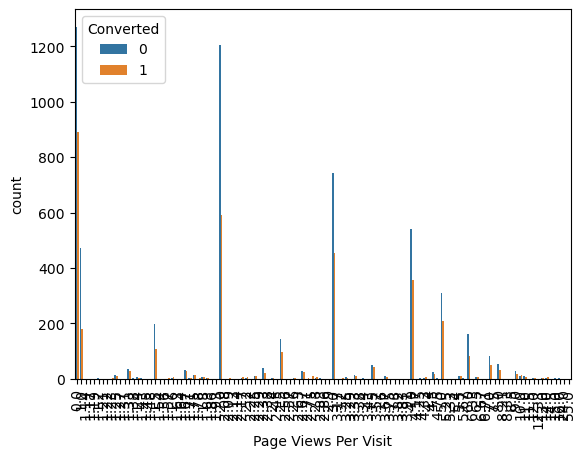

In [64]:
# 22. Page Views Per Visit
sns.countplot(x = "Page Views Per Visit", hue="Converted", data = df)
plt.xticks(rotation = 90)

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

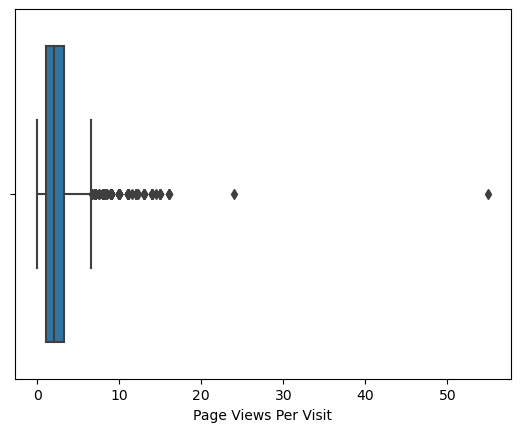

In [65]:
sns.boxplot(df['Page Views Per Visit'])

In [66]:
# Removing outliers
outliers_remove = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= outliers_remove[0]] = outliers_remove[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= outliers_remove[1]] = outliers_remove[1]

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_47895/970908733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Page Views Per Visit'][df['Page Views Per Visit'] <= outliers_remove[0]] = outliers_remove[0]
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_47895/970908733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Page Views Per Visit'][df['Page Views Per Visit'] >= outliers_remove[1]] = outliers_remove[1]


/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

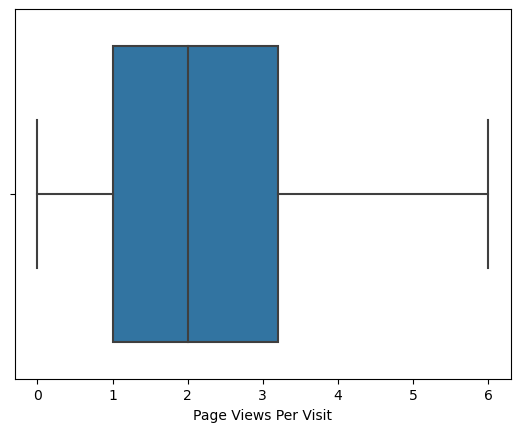

In [67]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

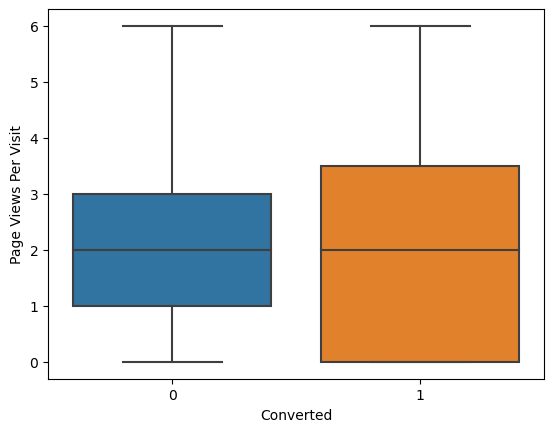

In [68]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df)

- The median is the same for converted and unconverted leads.
 ### Nothing specific about lead conversion from page views per visit can be said.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '41.0'),
  Text(33, 0, '42.0'),
  Text(34, 0, '43.0'),
  Text(35, 0, '54.0'),
  

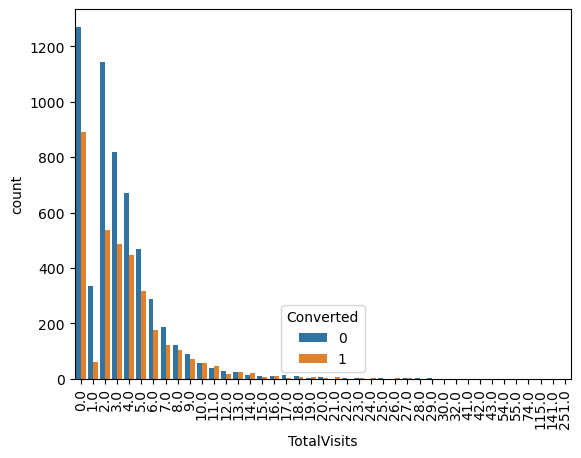

In [69]:
## 23 TotalVisits
sns.countplot(x = "TotalVisits", hue="Converted", data = df)
plt.xticks(rotation = 90)

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

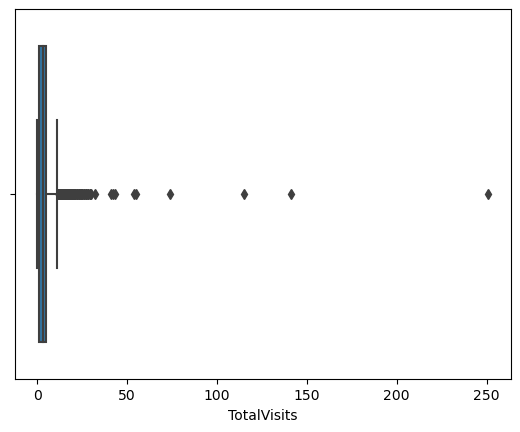

In [70]:
sns.boxplot(df['TotalVisits'])

In [71]:
# removing outliers
outliers_remove = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= outliers_remove[0]] = outliers_remove[0]
df['TotalVisits'][df['TotalVisits'] >= outliers_remove[1]] = outliers_remove[1]

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_47895/1684519042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalVisits'][df['TotalVisits'] <= outliers_remove[0]] = outliers_remove[0]
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_47895/1684519042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalVisits'][df['TotalVisits'] >= outliers_remove[1]] = outliers_remove[1]


/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

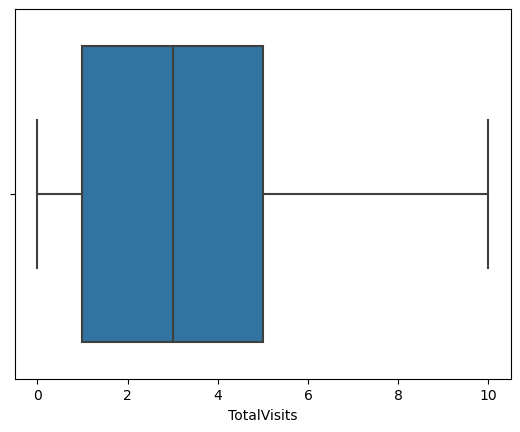

In [72]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

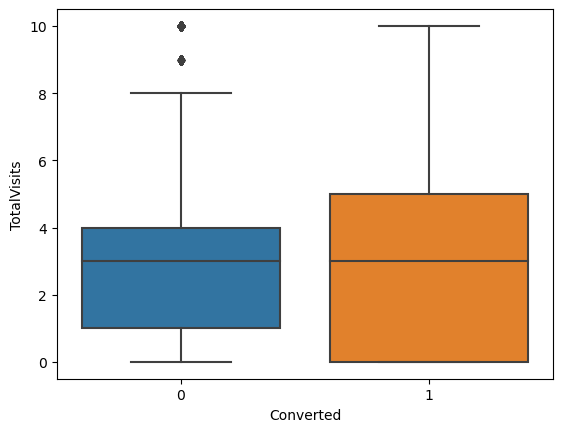

In [73]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data =df)

- The median is the same for converted and unconverted leads.
### Nothing specific about lead conversion from TotalVisits can be said.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

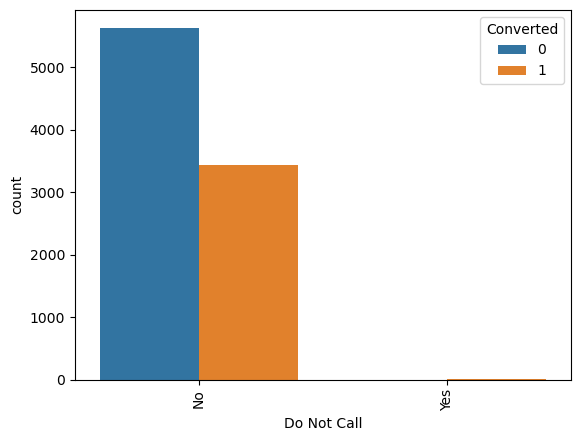

In [74]:
# 24. Do not call
sns.countplot(x = "Do Not Call", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

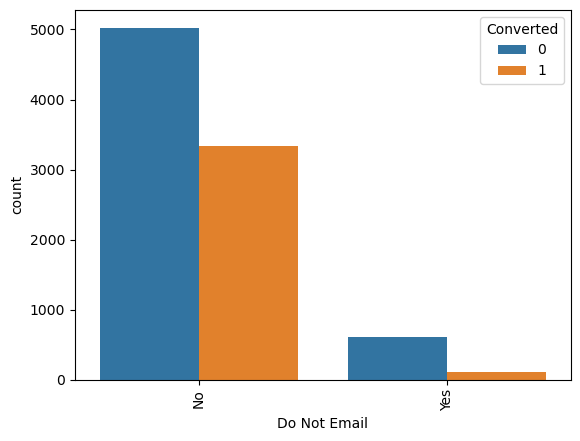

In [75]:
# 25. Do Not Email
sns.countplot(x = "Do Not Email", hue="Converted", data = df)
plt.xticks(rotation = 90)

'No' answers make up the majority of entries. This parameter cannot be used to draw any inferences.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

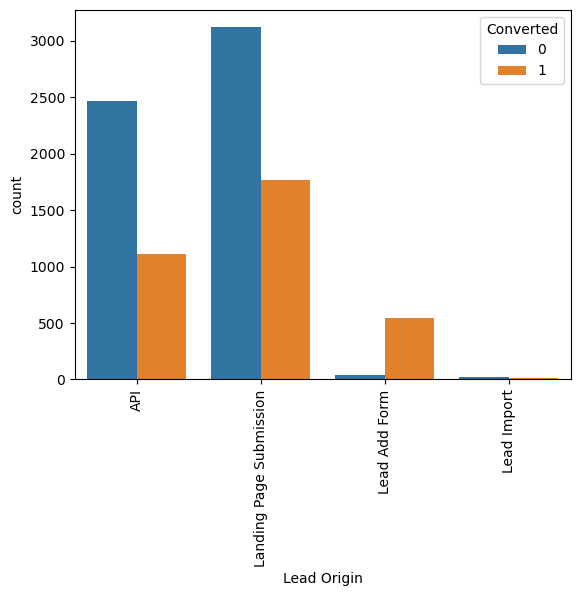

In [76]:
# 26. Lead Origin
sns.countplot(x = "Lead Origin", hue="Converted", data = df)
plt.xticks(rotation = 90)

- Although the conversion rates for landing page and API submissions are between 30 and 35 percent, they nevertheless generate a sizable amount of leads.
- While the lead count is not very big, the lead add form has a conversion rate of more than 90%.
- Lead imports are quite rare.
#### We need to concentrate more on enhancing lead conversion of API and Landing Page Submission origin and produce more leads through Lead Add Form in order to increase total lead conversion rate.


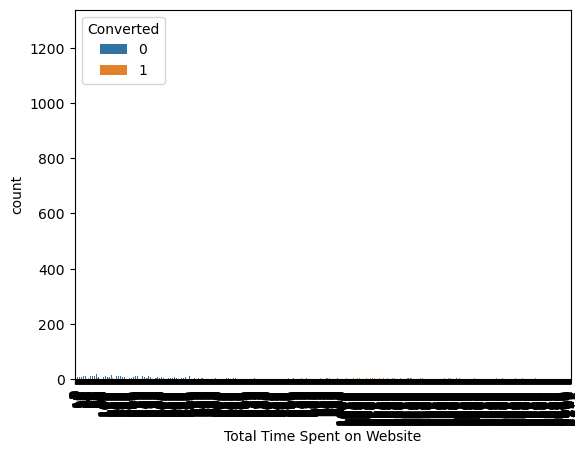

In [77]:
# 27.Total Time Spent on Website
sns.countplot(x = "Total Time Spent on Website", hue="Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Time Spent on Website'>

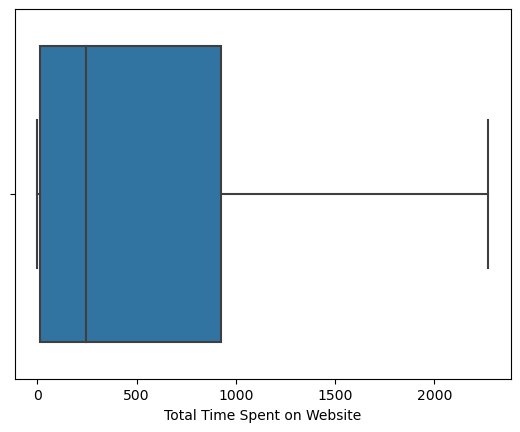

In [78]:
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

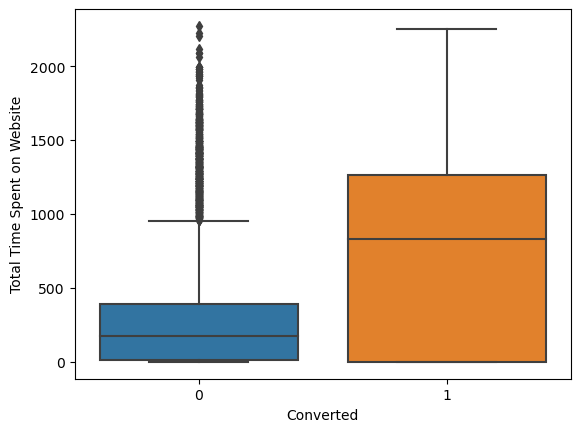

In [79]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data =df)

- Leads who spend more time on the website have a higher chance of becoming customers.
### To get visitors to stay on the website longer, it should be made more interesting.


# Conclusions from EDA
### We can remove numerous columns from the model because the univariate analysis revealed that they don't provide any new information, allowing for further analysis.


In [80]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_47895/3029995385.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',


In [81]:
df

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Other_Activity,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,SMS Sent


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# Data Preparation


In [83]:
# binary conversion to 1 and 0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [84]:
# Dummy Varibles creation categorical variables
dummy_vari= pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_vari.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Remaining,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
df = pd.concat([df, dummy_vari], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [86]:
# droping varibles which dummies created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [87]:
df

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,1,0,1,8.0,1845,2.67,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,0,0,0,2.0,238,2.00,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,1,0,0,2.0,199,2.00,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,0,0,1,3.0,499,3.00,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
# Lets spilt the data for training and testing and start model trainig
X = df.drop(['Prospect ID','Converted'], axis=1)
y = df['Converted']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

# RFE Modeling

In [92]:
from sklearn.feature_selection import RFE 

In [93]:
logreg = LogisticRegression()
rfe = RFE(logreg,step=20)             
rfe = rfe.fit(X_train, y_train)

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [94]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Remaining', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Acti

In [96]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_H

In [97]:
# Building the Model
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Sat, 20 May 2023   Deviance:                       5135.2
Time:                        23:53:28   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Other_Activity                             2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

In [98]:
col1 = cols.drop('What is your current occupation_Housewife')

In [99]:
# Rebuildong the model
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sat, 20 May 2023   Deviance:                       5139.0
Time:                        23:53:28   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0893      1.642      1.272      0.203      -1.129       5.307
Do Not Email                                            -1.6601      0.210     -7.893      0.000      -2.072      -1.248
Do Not Call                                             20.6175      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1090      0.041     26.988      0.000       1.028       1.190
Lead Origin_Landing Page Submission                     -1.1060      0.130     -8.488      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.5026      0.889      1.690      0.091      -0.240       3.246
Lead Origin_Lead Import                                  0.9113      0.477      1.913      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1031      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8312      0.914      2.004      0.045       0.041       3.622
Lead Source_Welingak Website                             4.3991      1.147      3.836      0.000       2.151       6.647
Last Activity_Email Link Clicked                         0.4630      0.396      1.170      0.242      -0.313       1.239
Last Activity_Email Opened                               0.6694      0.185      3.625      0.000       0.307       1.031
Last Activity_Olark Chat Conversation                   -0.6158      0.227     -2.716      0.007      -1.060      -0.171
Last Activity_Other_Activity                             2.1672      0.603      3.596      0.000       0.986       3.348
Last Activity_SMS Sent                                   1.1207      0.187      6.002      0.000       0.755       1.487
Last Activity_Unreachable                                0.3037      0.509      0.597      0.550      -0.693       1.301
Last Activity_Unsubscribed                               1.4012      1.124      1.246      0.213      -0.803       3.605
Specialization_Hospitality Management                   -0.4286      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1398      0.127     -9.000      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0879      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5340      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0951      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0

In [100]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [101]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sat, 20 May 2023   Deviance:                       5139.1
Time:                        23:53:28   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3292      1.165      1.999      0.046       0.045       4.613
Do Not Email                                            -1.6609      0.210     -7.894      0.000      -2.073      -1.248
Do Not Call                                             20.6173      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1089      0.041     26.987      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1062      0.130     -8.491      0.000      -1.362      -0.851
Lead Origin_Lead Add Form                                1.5025      0.889      1.690      0.091      -0.240       3.245
Lead Origin_Lead Import                                  0.9110      0.477      1.912      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1026      0.125      8.852      0.000       0.858       1.347
Lead Source_Reference                                    1.8308      0.914      2.004      0.045       0.040       3.621
Lead Source_Welingak Website                             4.3992      1.147      3.836      0.000       2.152       6.647
Last Activity_Email Link Clicked                         0.4639      0.396      1.172      0.241      -0.312       1.240
Last Activity_Email Opened                               0.6702      0.185      3.631      0.000       0.308       1.032
Last Activity_Olark Chat Conversation                   -0.6148      0.227     -2.712      0.007      -1.059      -0.170
Last Activity_Other_Activity                             2.1863      0.595      3.673      0.000       1.020       3.353
Last Activity_SMS Sent                                   1.1216      0.187      6.008      0.000       0.756       1.487
Last Activity_Unreachable                                0.3045      0.509      0.599      0.549      -0.693       1.302
Last Activity_Unsubscribed                               1.4024      1.124      1.247      0.212      -0.801       3.606
Specialization_Hospitality Management                   -0.4286      0.329     -1.303      0.192      -1.073       0.216
Specialization_Others                                   -1.1401      0.127     -9.003      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0880      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5342      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0948      0.624      1.754      0.079      -0.129       2.318
City_Tier II Cities                                     -0

In [102]:
col1 = col1.drop('Do Not Call','Last Notable Activity_View in browser link Clicked	')

In [103]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.2
Date:                Sat, 20 May 2023   Deviance:                       5140.4
Time:                        23:53:28   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3293      1.166      1.998      0.046       0.045       4.614
Do Not Email                                            -1.6619      0.211     -7.894      0.000      -2.075      -1.249
Total Time Spent on Website                              1.1092      0.041     26.997      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1106      0.130     -8.530      0.000      -1.366      -0.855
Lead Origin_Lead Add Form                                1.5002      0.889      1.687      0.092      -0.242       3.243
Lead Origin_Lead Import                                  0.9089      0.477      1.907      0.057      -0.025       1.843
Lead Source_Olark Chat                                   1.1014      0.125      8.842      0.000       0.857       1.345
Lead Source_Reference                                    1.8501      0.913      2.025      0.043       0.060       3.640
Lead Source_Welingak Website                             4.4027      1.147      3.840      0.000       2.155       6.650
Last Activity_Email Link Clicked                         0.4632      0.396      1.169      0.242      -0.313       1.240
Last Activity_Email Opened                               0.6729      0.185      3.647      0.000       0.311       1.035
Last Activity_Olark Chat Conversation                   -0.6023      0.226     -2.670      0.008      -1.045      -0.160
Last Activity_Other_Activity                             2.1875      0.595      3.674      0.000       1.021       3.354
Last Activity_SMS Sent                                   1.1211      0.187      6.003      0.000       0.755       1.487
Last Activity_Unreachable                                0.3040      0.509      0.597      0.550      -0.694       1.302
Last Activity_Unsubscribed                               1.4032      1.125      1.248      0.212      -0.801       3.607
Specialization_Hospitality Management                   -0.4311      0.329     -1.310      0.190      -1.076       0.214
Specialization_Others                                   -1.1455      0.127     -9.051      0.000      -1.394      -0.897
What is your current occupation_Student                 -1.0860      0.638     -1.702      0.089      -2.337       0.165
What is your current occupation_Unemployed              -1.5314      0.597     -2.566      0.010      -2.701      -0.362
What is your current occupation_Working Professional     1.0965      0.625      1.755      0.079      -0.128       2.321
City_Tier II Cities                                     -0.5648      0.456     -1.239      0.215      -1.458       0.328
Last Notable Activity_Email Bounced                     -0

In [104]:
col1 = col1.drop('Last Notable Activity_View in browser link Clicked')

In [105]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.2
Date:                Sat, 20 May 2023   Deviance:                       5144.5
Time:                        23:53:28   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8049      1.088      1.658      0.097      -0.328       3.938
Do Not Email                                            -1.6603      0.210     -7.898      0.000      -2.072      -1.248
Total Time Spent on Website                              1.1101      0.041     27.026      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.0981      0.130     -8.450      0.000      -1.353      -0.843
Lead Origin_Lead Add Form                                1.5077      0.889      1.695      0.090      -0.236       3.251
Lead Origin_Lead Import                                  0.9177      0.476      1.926      0.054      -0.016       1.851
Lead Source_Olark Chat                                   1.1064      0.125      8.886      0.000       0.862       1.350
Lead Source_Reference                                    1.8509      0.914      2.026      0.043       0.060       3.642
Lead Source_Welingak Website                             4.3984      1.147      3.835      0.000       2.151       6.646
Last Activity_Email Link Clicked                         0.4617      0.396      1.166      0.244      -0.315       1.238
Last Activity_Email Opened                               0.6714      0.184      3.639      0.000       0.310       1.033
Last Activity_Olark Chat Conversation                   -0.6034      0.226     -2.675      0.007      -1.046      -0.161
Last Activity_Other_Activity                             2.1486      0.597      3.597      0.000       0.978       3.319
Last Activity_SMS Sent                                   1.1192      0.187      5.994      0.000       0.753       1.485
Last Activity_Unreachable                                0.3018      0.509      0.593      0.553      -0.696       1.299
Last Activity_Unsubscribed                               1.4002      1.125      1.245      0.213      -0.804       3.605
Specialization_Hospitality Management                   -0.4310      0.329     -1.310      0.190      -1.076       0.214
Specialization_Others                                   -1.1363      0.126     -8.990      0.000      -1.384      -0.889
What is your current occupation_Student                 -1.0887      0.638     -1.707      0.088      -2.339       0.162
What is your current occupation_Unemployed              -1.5335      0.596     -2.571      0.010      -2.702      -0.365
What is your current occupation_Working Professional     1.0952      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0.5666      0.456     -1.243      0.214      -1.460       0.327
Last Notable Activity_Email Bounced                     -0

In [106]:
col1 = col1.drop('Last Notable Activity_Email Bounced')

In [107]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.2
Date:                Sat, 20 May 2023   Deviance:                       5144.5
Time:                        23:53:28   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7158      0.767      2.237      0.025       0.212       3.219
Do Not Email                                            -1.6645      0.207     -8.037      0.000      -2.070      -1.259
Total Time Spent on Website                              1.1100      0.041     27.026      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.0982      0.130     -8.451      0.000      -1.353      -0.844
Lead Origin_Lead Add Form                                1.5076      0.889      1.695      0.090      -0.236       3.251
Lead Origin_Lead Import                                  0.9175      0.476      1.926      0.054      -0.016       1.851
Lead Source_Olark Chat                                   1.1063      0.125      8.885      0.000       0.862       1.350
Lead Source_Reference                                    1.8514      0.914      2.026      0.043       0.061       3.642
Lead Source_Welingak Website                             4.3982      1.147      3.835      0.000       2.150       6.646
Last Activity_Email Link Clicked                         0.4630      0.396      1.169      0.242      -0.313       1.239
Last Activity_Email Opened                               0.6726      0.184      3.652      0.000       0.312       1.034
Last Activity_Olark Chat Conversation                   -0.6020      0.225     -2.672      0.008      -1.043      -0.160
Last Activity_Other_Activity                             2.1838      0.514      4.248      0.000       1.176       3.191
Last Activity_SMS Sent                                   1.1207      0.186      6.015      0.000       0.755       1.486
Last Activity_Unreachable                                0.3032      0.509      0.596      0.551      -0.694       1.300
Last Activity_Unsubscribed                               1.4041      1.124      1.249      0.212      -0.799       3.608
Specialization_Hospitality Management                   -0.4316      0.329     -1.313      0.189      -1.076       0.213
Specialization_Others                                   -1.1368      0.126     -9.000      0.000      -1.384      -0.889
What is your current occupation_Student                 -1.0892      0.638     -1.707      0.088      -2.340       0.161
What is your current occupation_Unemployed              -1.5340      0.596     -2.572      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0943      0.624      1.753      0.080      -0.129       2.318
City_Tier II Cities                                     -0.5661      0.456     -1.242      0.214      -1.460       0.327
Last Notable Activity_Email Link Clicked                -1

In [108]:
col1 = col1.drop('Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent')

In [109]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.3
Date:                Sat, 20 May 2023   Deviance:                       5144.5
Time:                        23:53:29   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6768      0.753      2.227      0.026       0.201       3.152
Do Not Email                                            -1.6620      0.207     -8.035      0.000      -2.067      -1.257
Total Time Spent on Website                              1.1098      0.041     27.027      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0980      0.130     -8.450      0.000      -1.353      -0.843
Lead Origin_Lead Add Form                                1.5075      0.889      1.695      0.090      -0.236       3.251
Lead Origin_Lead Import                                  0.9174      0.476      1.926      0.054      -0.016       1.851
Lead Source_Olark Chat                                   1.1060      0.125      8.883      0.000       0.862       1.350
Lead Source_Reference                                    1.8513      0.914      2.026      0.043       0.060       3.642
Lead Source_Welingak Website                             4.3992      1.147      3.836      0.000       2.151       6.647
Last Activity_Email Link Clicked                         0.4608      0.396      1.164      0.244      -0.315       1.237
Last Activity_Email Opened                               0.6705      0.184      3.645      0.000       0.310       1.031
Last Activity_Olark Chat Conversation                   -0.6040      0.225     -2.684      0.007      -1.045      -0.163
Last Activity_Other_Activity                             2.1971      0.511      4.297      0.000       1.195       3.199
Last Activity_SMS Sent                                   1.1183      0.186      6.011      0.000       0.754       1.483
Last Activity_Unreachable                                0.3008      0.509      0.591      0.554      -0.696       1.298
Last Activity_Unsubscribed                               1.1545      0.585      1.972      0.049       0.007       2.302
Specialization_Hospitality Management                   -0.4315      0.329     -1.312      0.190      -1.076       0.213
Specialization_Others                                   -1.1367      0.126     -9.000      0.000      -1.384      -0.889
What is your current occupation_Student                 -1.0884      0.638     -1.706      0.088      -2.339       0.162
What is your current occupation_Unemployed              -1.5332      0.596     -2.571      0.010      -2.702      -0.364
What is your current occupation_Working Professional     1.0947      0.624      1.754      0.080      -0.129       2.318
City_Tier II Cities                                     -0.5667      0.456     -1.243      0.214      -1.460       0.327
Last Notable Activity_Email Link Clicked                -1

In [110]:
col1 = col1.drop('Lead Origin_Lead Add Form','Last Notable Activity_SMS Sent')
                

In [111]:
 col1 = col1.drop('Last Notable Activity_Page Visited on Website','Last Notable Activity_SMS Sent')

In [112]:
col1 = col1.drop('Last Activity_Unreachable','Specialization_Hospitality Management')

In [113]:
col1 = col1.drop('What is your current occupation_Student','City_Tier II Cities')

In [114]:
col1 = col1.drop('Last Notable Activity_Email Opened','Last Notable Activity_Olark Chat Conversation')

In [115]:
col1 = col1.drop('Last Activity_Email Opened','Last Activity_Email Link Clicked')

In [116]:
col1 = col1.drop('Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website')

In [117]:
col1 = col1.drop('Specialization_Hospitality Management')

In [118]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.9
Date:                Sat, 20 May 2023   Deviance:                       5169.9
Time:                        23:53:29   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4129      0.240      1.720      0.085      -0.058       0.883
Do Not Email                                            -1.6969      0.191     -8.871      0.000      -2.072      -1.322
Total Time Spent on Website                              1.1063      0.041     27.146      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1393      0.129     -8.842      0.000      -1.392      -0.887
Lead Origin_Lead Import                                  0.9537      0.478      1.995      0.046       0.017       1.890
Lead Source_Olark Chat                                   1.1255      0.124      9.069      0.000       0.882       1.369
Lead Source_Reference                                    3.3883      0.243     13.924      0.000       2.911       3.865
Lead Source_Welingak Website                             5.9697      0.732      8.154      0.000       4.535       7.405
Last Activity_Email Link Clicked                        -0.2729      0.213     -1.283      0.199      -0.690       0.144
Last Activity_Olark Chat Conversation                   -0.9578      0.201     -4.772      0.000      -1.351      -0.564
Last Activity_Other_Activity                             2.1519      0.460      4.677      0.000       1.250       3.054
Last Activity_SMS Sent                                   0.7807      0.159      4.923      0.000       0.470       1.092
Last Activity_Unsubscribed                               1.4226      0.481      2.959      0.003       0.480       2.365
Specialization_Others                                   -1.1619      0.126     -9.256      0.000      -1.408      -0.916
What is your current occupation_Unemployed              -0.5977      0.212     -2.815      0.005      -1.014      -0.181
What is your current occupation_Working Professional     2.0132      0.283      7.122      0.000       1.459       2.567
City_Tier II Cities                                     -0.6219      0.454     -1.371      0.170      -1.511       0.267
Last Notable Activity_Modified                          -0.6758      0.101     -6.676      0.000      -0.874      -0.477
Last Notable Activity_Olark Chat Conversation           -0.4141      0.380     -1.091      0.275      -1.158       0.330
Last Notable Activity_SMS Sent                           0.7094      0.180      3.948      0.000       0.357       1.062
Last Notable Activity_Unreachable                        1.6113      0.476      3.386      0.001       0.679       2.544
========================================================================================================================
"""

In [119]:
# Vif modeling
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,9.88
18,Last Notable Activity_SMS Sent,6.68
10,Last Activity_SMS Sent,6.39
2,Lead Origin_Landing Page Submission,5.77
12,Specialization_Others,4.01
16,Last Notable Activity_Modified,2.76
4,Lead Source_Olark Chat,2.25
8,Last Activity_Olark Chat Conversation,2.07
14,What is your current occupation_Working Profes...,1.68
5,Lead Source_Reference,1.46


In [120]:
# lets drop high VIF values 
col1 = col1.drop('What is your current occupation_Unemployed')

In [121]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.8
Date:                Sat, 20 May 2023   Deviance:                       5177.6
Time:                        23:53:29   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1557      0.129     -1.210      0.226      -0.408       0.096
Do Not Email                                            -1.6920      0.191     -8.837      0.000      -2.067      -1.317
Total Time Spent on Website                              1.1063      0.041     27.159      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1432      0.129     -8.865      0.000      -1.396      -0.890
Lead Origin_Lead Import                                  0.9345      0.478      1.955      0.051      -0.002       1.871
Lead Source_Olark Chat                                   1.1314      0.124      9.116      0.000       0.888       1.375
Lead Source_Reference                                    3.4001      0.243     13.991      0.000       2.924       3.876
Lead Source_Welingak Website                             5.9608      0.732      8.143      0.000       4.526       7.396
Last Activity_Email Link Clicked                        -0.2761      0.213     -1.299      0.194      -0.693       0.140
Last Activity_Olark Chat Conversation                   -0.9500      0.201     -4.737      0.000      -1.343      -0.557
Last Activity_Other_Activity                             2.1335      0.460      4.636      0.000       1.231       3.036
Last Activity_SMS Sent                                   0.7685      0.158      4.852      0.000       0.458       1.079
Last Activity_Unsubscribed                               1.3959      0.481      2.904      0.004       0.454       2.338
Specialization_Others                                   -1.1738      0.126     -9.336      0.000      -1.420      -0.927
What is your current occupation_Working Professional     2.5917      0.195     13.315      0.000       2.210       2.973
City_Tier II Cities                                     -0.6368      0.453     -1.405      0.160      -1.525       0.252
Last Notable Activity_Modified                          -0.6835      0.101     -6.753      0.000      -0.882      -0.485
Last Notable Activity_Olark Chat Conversation           -0.4107      0.379     -1.084      0.278      -1.153       0.332
Last Notable Activity_SMS Sent                           0.7053      0.180      3.928      0.000       0.353       1.057
Last Notable Activity_Unreachable                        1.5950      0.475      3.361      0.001       0.665       2.525
========================================================================================================================
"""

In [122]:
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

In [123]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.4
Date:                Sat, 20 May 2023   Deviance:                       5178.8
Time:                        23:53:29   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1602      0.129     -1.245      0.213      -0.412       0.092
Do Not Email                                            -1.6967      0.191     -8.876      0.000      -2.071      -1.322
Total Time Spent on Website                              1.1040      0.041     27.154      0.000       1.024       1.184
Lead Origin_Landing Page Submission                     -1.1466      0.129     -8.893      0.000      -1.399      -0.894
Lead Origin_Lead Import                                  0.9331      0.478      1.952      0.051      -0.004       1.870
Lead Source_Olark Chat                                   1.1296      0.124      9.099      0.000       0.886       1.373
Lead Source_Reference                                    3.3958      0.243     13.976      0.000       2.920       3.872
Lead Source_Welingak Website                             5.9481      0.732      8.130      0.000       4.514       7.382
Last Activity_Email Link Clicked                        -0.2756      0.212     -1.298      0.194      -0.692       0.141
Last Activity_Olark Chat Conversation                   -1.0667      0.173     -6.153      0.000      -1.407      -0.727
Last Activity_Other_Activity                             2.1242      0.460      4.622      0.000       1.223       3.025
Last Activity_SMS Sent                                   0.7465      0.157      4.759      0.000       0.439       1.054
Last Activity_Unsubscribed                               1.4029      0.480      2.922      0.003       0.462       2.344
Specialization_Others                                   -1.1773      0.126     -9.360      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.5921      0.195     13.323      0.000       2.211       2.973
City_Tier II Cities                                     -0.6376      0.453     -1.409      0.159      -1.525       0.249
Last Notable Activity_Modified                          -0.6526      0.097     -6.741      0.000      -0.842      -0.463
Last Notable Activity_SMS Sent                           0.7358      0.177      4.154      0.000       0.389       1.083
Last Notable Activity_Unreachable                        1.6025      0.474      3.377      0.001       0.672       2.532
========================================================================================================================
"""

In [124]:
col1 = col1.drop('City_Tier II Cities','Last Activity_Email Link Clicked')

In [125]:
col1 = col1.drop('Lead Origin_Lead Import')

In [126]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.2
Date:                Sat, 20 May 2023   Deviance:                       5184.4
Time:                        23:53:29   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1162      0.127     -0.916      0.360      -0.365       0.132
Do Not Email                                            -1.7076      0.191     -8.956      0.000      -2.081      -1.334
Total Time Spent on Website                              1.0961      0.040     27.152      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1900      0.128     -9.319      0.000      -1.440      -0.940
Lead Source_Olark Chat                                   1.1022      0.123      8.950      0.000       0.861       1.344
Lead Source_Reference                                    3.3602      0.242     13.870      0.000       2.885       3.835
Lead Source_Welingak Website                             5.9236      0.732      8.098      0.000       4.490       7.357
Last Activity_Email Link Clicked                        -0.2805      0.212     -1.322      0.186      -0.696       0.135
Last Activity_Olark Chat Conversation                   -1.0687      0.173     -6.166      0.000      -1.408      -0.729
Last Activity_Other_Activity                             2.1198      0.459      4.617      0.000       1.220       3.020
Last Activity_SMS Sent                                   0.7554      0.157      4.822      0.000       0.448       1.062
Last Activity_Unsubscribed                               1.4105      0.479      2.943      0.003       0.471       2.350
Specialization_Others                                   -1.1993      0.126     -9.544      0.000      -1.446      -0.953
What is your current occupation_Working Professional     2.5885      0.194     13.329      0.000       2.208       2.969
Last Notable Activity_Modified                          -0.6591      0.097     -6.814      0.000      -0.849      -0.470
Last Notable Activity_SMS Sent                           0.7195      0.177      4.069      0.000       0.373       1.066
Last Notable Activity_Unreachable                        1.5936      0.474      3.359      0.001       0.664       2.523
========================================================================================================================
"""

In [127]:
col1 = col1.drop('Last Activity_Email Link Clicked')

In [128]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sat, 20 May 2023   Deviance:                       5186.2
Time:                        23:53:29   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1281      0.127     -1.012      0.312      -0.376       0.120
Do Not Email                                            -1.7017      0.191     -8.922      0.000      -2.076      -1.328
Total Time Spent on Website                              1.0961      0.040     27.161      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1915      0.128     -9.333      0.000      -1.442      -0.941
Lead Source_Olark Chat                                   1.0930      0.123      8.897      0.000       0.852       1.334
Lead Source_Reference                                    3.3495      0.242     13.839      0.000       2.875       3.824
Lead Source_Welingak Website                             5.9157      0.731      8.088      0.000       4.482       7.349
Last Activity_Olark Chat Conversation                   -1.0509      0.173     -6.081      0.000      -1.390      -0.712
Last Activity_Other_Activity                             2.1337      0.459      4.648      0.000       1.234       3.033
Last Activity_SMS Sent                                   0.7691      0.156      4.920      0.000       0.463       1.076
Last Activity_Unsubscribed                               1.4192      0.479      2.961      0.003       0.480       2.359
Specialization_Others                                   -1.1999      0.126     -9.553      0.000      -1.446      -0.954
What is your current occupation_Working Professional     2.5913      0.194     13.336      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6587      0.097     -6.812      0.000      -0.848      -0.469
Last Notable Activity_SMS Sent                           0.7200      0.177      4.072      0.000       0.373       1.066
Last Notable Activity_Unreachable                        1.6073      0.474      3.389      0.001       0.678       2.537
========================================================================================================================
"""

In [129]:
# LEts check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.25
12,Last Notable Activity_Modified,2.35
10,Specialization_Others,2.21
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.79
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [130]:
# Droping some columns and then checking again
col1 = col1.drop('Last Notable Activity_Unreachable','Last Notable Activity_Modified')

In [131]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.0
Date:                Sat, 20 May 2023   Deviance:                       5198.0
Time:                        23:53:29   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1012      0.126     -0.802      0.422      -0.348       0.146
Do Not Email                                            -1.7026      0.191     -8.929      0.000      -2.076      -1.329
Total Time Spent on Website                              1.0926      0.040     27.135      0.000       1.014       1.172
Lead Origin_Landing Page Submission                     -1.1961      0.128     -9.380      0.000      -1.446      -0.946
Lead Source_Olark Chat                                   1.0822      0.123      8.826      0.000       0.842       1.322
Lead Source_Reference                                    3.3368      0.242     13.796      0.000       2.863       3.811
Lead Source_Welingak Website                             5.9010      0.731      8.068      0.000       4.468       7.335
Last Activity_Olark Chat Conversation                   -1.0548      0.173     -6.106      0.000      -1.393      -0.716
Last Activity_Other_Activity                             2.1227      0.459      4.623      0.000       1.223       3.023
Last Activity_SMS Sent                                   0.7677      0.156      4.913      0.000       0.461       1.074
Last Activity_Unsubscribed                               1.4035      0.479      2.929      0.003       0.464       2.343
Specialization_Others                                   -1.2033      0.125     -9.589      0.000      -1.449      -0.957
What is your current occupation_Working Professional     2.5929      0.194     13.359      0.000       2.213       2.973
Last Notable Activity_Modified                          -0.6775      0.096     -7.025      0.000      -0.866      -0.488
Last Notable Activity_SMS Sent                           0.7008      0.177      3.969      0.000       0.355       1.047
========================================================================================================================
"""

all p values are 0 now lets check for vif

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.41
8,Last Activity_SMS Sent,6.25
12,Last Notable Activity_Modified,2.35
10,Specialization_Others,2.20
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.78
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [133]:
col1 = col1.drop('Last Notable Activity_SMS Sent','Last Activity_SMS Sent')

In [134]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[col1])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Sat, 20 May 2023   Deviance:                       5214.0
Time:                        23:53:29   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0474      0.125     -0.378      0.705      -0.293       0.198
Do Not Email                                            -1.6797      0.191     -8.807      0.000      -2.053      -1.306
Total Time Spent on Website                              1.0943      0.040     27.185      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.1910      0.128     -9.338      0.000      -1.441      -0.941
Lead Source_Olark Chat                                   1.0811      0.122      8.837      0.000       0.841       1.321
Lead Source_Reference                                    3.3281      0.242     13.772      0.000       2.854       3.802
Lead Source_Welingak Website                             5.8458      0.729      8.015      0.000       4.416       7.275
Last Activity_Olark Chat Conversation                   -0.9554      0.171     -5.574      0.000      -1.291      -0.619
Last Activity_Other_Activity                             2.1868      0.463      4.726      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3095      0.075     17.435      0.000       1.162       1.457
Last Activity_Unsubscribed                               1.3641      0.482      2.830      0.005       0.419       2.309
Specialization_Others                                   -1.2017      0.126     -9.571      0.000      -1.448      -0.956
What is your current occupation_Working Professional     2.6075      0.194     13.410      0.000       2.226       2.989
Last Notable Activity_Modified                          -0.8936      0.081    -11.002      0.000      -1.053      -0.734
========================================================================================================================
"""

In [135]:
# Checking Vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


## It can be observed here the p values for columns are now 0 and VIF values are not too high hence model 14 can be considered as the final model for evaluation

# Lets start the prediction on training set

In [136]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.195642
1012    0.108782
9226    0.326407
4750    0.866384
7987    0.799849
1281    0.745412
2880    0.099499
4971    0.965955
7536    0.853269
1248    0.770418
dtype: float64

In [137]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19564211, 0.10878227, 0.32640737, 0.86638384, 0.79984858,
       0.74541236, 0.09949947, 0.96595542, 0.85326938, 0.77041836])

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.195642,3009
1,0,0.108782,1012
2,0,0.326407,9226
3,1,0.866384,4750
4,1,0.799849,7987


In [139]:
# LEt the cut off point be 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.195642,3009,0
1,0,0.108782,1012,0
2,0,0.326407,9226,0
3,1,0.866384,4750,1
4,1,0.799849,7987,1


In [140]:
# Lets check the confusion matrix
con = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(con)

[[3459  446]
 [ 716 1730]]


In [141]:
# Checking the accuraccy
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8170366871358841


In [142]:
# Lets check TP TN FP FN
TP = con[1,1] # true positive 
TN = con[0,0] # true negatives
FP = con[0,1] # false positives
FN = con[1,0] # false negatives

In [143]:
print("Sensitivity : ",TP / float(TP+FN)*100)
print("Specificity : ",TN / float(TN+FP)*100)
print("False Positive Rate :",FP/ float(TN+FP)*100)
print("Positive Predictive Value :",TP / float(TP+FP)*100)
print ("Negative predictive value :",TN / float(TN+ FN)*100)

Sensitivity :  70.72771872444807
Specificity :  88.57874519846351
False Positive Rate : 11.421254801536492
Positive Predictive Value : 79.50367647058823
Negative predictive value : 82.8502994011976


### - Our specificity was determined to be good (88.5%) but our sensitivity was just 70.7%. As a result, this needs to be resolved.
### - Our sensitivity was 70%, mostly as a result of the arbitrary cut-off point of 0.5 that we used. The ROC curve will be used to optimise this cut-off point in order to obtain a respectable value for sensitivity.


# LETS BUILD ROC CURVE (receiver operating characteristic curve)

In [144]:
def roc_c( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

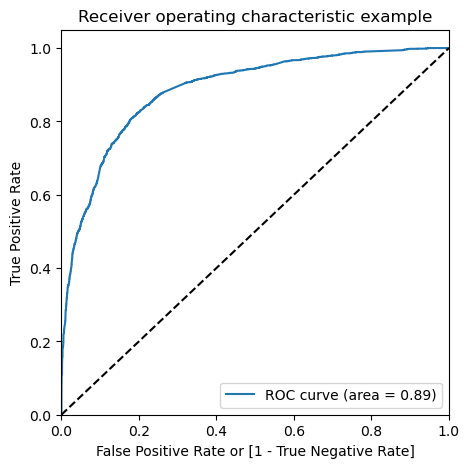

In [146]:
roc_c(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Since area under the curve is 89% therefore we can conclude our model is a good one

In [147]:
# Optimal cutoff point
# We had previously selected an arbitrary cut-off value of 0.5. 
# The section that follows discusses how to choose the ideal cut-off value. 
# The cutoff probability that provides balanced sensitivity and specificity is the ideal cutoff probability.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0


In [148]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.587781  0.973017  0.346479
0.2   0.2  0.749173  0.915372  0.645070
0.3   0.3  0.800976  0.849959  0.770294
0.4   0.4  0.816092  0.773508  0.842766
0.5   0.5  0.817037  0.707277  0.885787
0.6   0.6  0.797512  0.600164  0.921127
0.7   0.7  0.786490  0.529436  0.947503
0.8   0.8  0.761612  0.425184  0.972343
0.9   0.9  0.721619  0.296811  0.987708


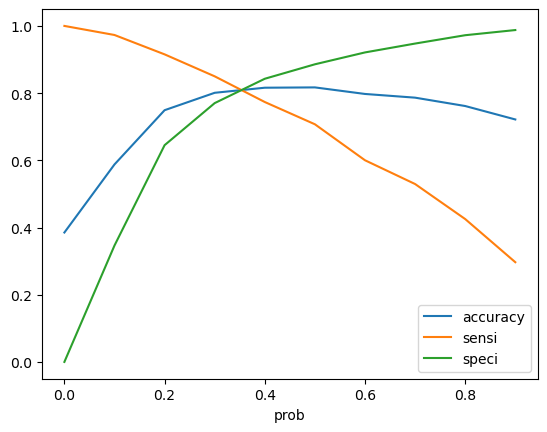

In [149]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# .34 is the optimum cuttoff to consider

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [151]:
# Assigning Data to the Training data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


# Now Lets Evaluate the model

In [152]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100)

Accuracy : 81.10533774208785


In [153]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat 

array([[3148,  757],
       [ 443, 2003]])

In [154]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [155]:
print("Sensitivity : ",TP / float(TP+FN)*100)
print("Specificity : ",TN / float(TN+FP)*100)
print("False Positive Rate :",FP/ float(TN+FP)*100)
print("Positive Predictive Value :",TP / float(TP+FP)*100)
print ("Negative predictive value :",TN / float(TN+ FN)*100)

Sensitivity :  81.88879803761243
Specificity :  80.6145966709347
False Positive Rate : 19.3854033290653
Positive Predictive Value : 72.57246376811595
Negative predictive value : 87.66360345307713


In [156]:
# Let check the precision and recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion 

array([[3459,  446],
       [ 716, 1730]])

In [157]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1])*100)
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1])*100)

Precision :  79.50367647058823
Recall : 70.72771872444807


# Lets make prediction on test set

In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [159]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [160]:
# Adding a const
X_test_sm = sm.add_constant(X_test)
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129393
1490    0.968762
7936    0.111751
4216    0.804505
3830    0.132210
1800    0.633964
6507    0.344721
4821    0.301208
4223    0.918045
4714    0.326407
dtype: float64

In [161]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1

,0
3271,0.129393
1490,0.968762
7936,0.111751
4216,0.804505
3830,0.132210
...,...
850,0.191545
2879,0.127654
6501,0.855574
7155,0.112004


In [162]:
y_test_df = pd.DataFrame(y_test)

In [163]:
y_test_df['ID'] = y_test_df.index
y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred1
y_predict = pd.concat([y_test_df, y_pred1],axis=1)
y_predict 

,Converted,ID,0
0,0,3271,0.129393
1,1,1490,0.968762
2,0,7936,0.111751
3,1,4216,0.804505
4,0,3830,0.132210
...,...,...,...
2718,0,850,0.191545
2719,0,2879,0.127654
2720,1,6501,0.855574
2721,0,7155,0.112004


In [165]:
y_predict= y_predict.rename(columns={ 0 : 'Converted_probality'})
y_predict = y_predict.reindex(columns=['ID','Converted','Converted_probality'])

In [166]:
y_predict['final_predicted'] = y_predict.Converted_probality.map(lambda x: 1 if x > 0.34 else 0)

In [167]:
y_predict

,ID,Converted,Converted_probality,final_predicted
0,3271,0,0.129393,0
1,1490,1,0.968762,1
2,7936,0,0.111751,0
3,4216,1,0.804505,1
4,3830,0,0.132210,0
...,...,...,...,...
2718,850,0,0.191545,0
2719,2879,0,0.127654,0
2720,6501,1,0.855574,1
2721,7155,0,0.112004,0


In [168]:
# now checking the accuracy of the model again
print("Accuracy :",metrics.accuracy_score(y_predict.Converted, y_predict.final_predicted)*100)

Accuracy : 80.42600073448402


In [169]:
confusion = metrics.confusion_matrix(y_predict.Converted, y_predict.final_predicted )
confusion 

array([[1394,  340],
       [ 193,  796]])

In [170]:
# Lets check TP TN FP FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [171]:
print("Sensitivity : ",TP / float(TP+FN)*100)
print("Specificity : ",TN / float(TN+FP)*100)
print("False Positive Rate :",FP/ float(TN+FP)*100)
print("Positive Predictive Value :",TP / float(TP+FP)*100)
print ("Negative predictive value :",TN / float(TN+ FN)*100)

Sensitivity :  80.48533872598584
Specificity :  80.3921568627451
False Positive Rate : 19.607843137254903
Positive Predictive Value : 70.07042253521126
Negative predictive value : 87.83868935097668


In [172]:
# Assinging the score to final test data
y_predict['Lead_Score'] = y_predict.Converted_probality.map( lambda x: round(x*100))
y_predict.head()

,ID,Converted,Converted_probality,final_predicted,Lead_Score
0,3271,0,0.129393,0,13
1,1490,1,0.968762,1,97
2,7936,0,0.111751,0,11
3,4216,1,0.804505,1,80
4,3830,0,0.132210,0,13


# FINAL OBVERVATIONS
### Sensitivity :  80.48%
### Specificity :  80.39%
### Accuracy : 80.42%

# RESULTS
### Train Data:                  
- Accuracy : 81.1 %           
- Sensitivity : 81.8 %         
- Specificity : 80.6 %        

### Train Data: 
- Accuracy : 80.4 %
-         Sensitivity : 80.4 %
- Specificity : 80.3 %

### Thus, we have succeeded in achieving our objective of estimating the desired lead conversion rate to be somewhere around 80%. We should be able to provide the CEO confidence to make wise decisions based on this model in order to achieve a higher lead conversion rate of 80% because the model appears to anticipate the conversion rate quite effectively.


# Finding out the leads which should be contacted:

In [173]:
hot_leads=y_predict.loc[y_predict["Lead_Score"]>=85]
hot_leads

,ID,Converted,Converted_probality,final_predicted,Lead_Score
1,1490,1,0.968762,1,97
8,4223,1,0.918045,1,92
16,1946,1,0.924785,1,92
21,2461,1,0.992852,1,99
23,5822,1,0.998025,1,100
...,...,...,...,...,...
2694,1566,1,0.947264,1,95
2699,6461,1,0.961690,1,96
2703,5741,1,0.908795,1,91
2715,6299,1,0.872460,1,87


### There are 368 hot leads which has high chance to get converted.

In [174]:
print("The  ID of the leads which can be converted :")

hot_leads_ids = hot_leads["ID"].values.reshape(-1)
hot_leads_ids

The  ID of the leads which can be converted :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

# Finding out the Important Features from our final model:

In [175]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.845756
Lead Source_Reference                                   3.328115
What is your current occupation_Working Professional    2.607500
Last Activity_Other_Activity                            2.186759
Last Activity_Unsubscribed                              1.364140
Last Activity_SMS Sent                                  1.309507
Total Time Spent on Website                             1.094285
Lead Source_Olark Chat                                  1.081150
const                                                  -0.047402
Last Notable Activity_Modified                         -0.893587
Last Activity_Olark Chat Conversation                  -0.955424
Lead Origin_Landing Page Submission                    -1.190991
Specialization_Others                                  -1.201711
Do Not Email                                           -1.679670
dtype: float64

# RECOMMENDATIONS THAT CAN BE PROVIDED
- Leads whose most recent activity was a "Olark Chat Conversation" should not be called by the business because they are unlikely to convert.

- Leads whose lead origin is "Landing Page Submission" should not be called by the company because they are unlikely to convert.

- Calling leads whose Specialisation was "Others" is not advised because it is unlikely that they will convert.

- Leads who selected "Do not Email" as "yes" should not be contacted by the business because they are unlikely to convert.

- Because they are more likely to convert, the company should call the leads from the "Welingak Websites" and "Reference" lead sources.

- Calls should be placed to "working professionals" as they are more likely to convert than other leads.

- Calling prospects who spend "more time on the websites" is a good idea for the business because these leads are more likely to convert.

- The business should call the leads obtained from the "Olark Chat" lead sources since they are more likely to convert.

- The business should call the leads whose most recent activity was sending an SMS because they are more likely to convert.



